In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
asu_df = pd.read_csv('https://raw.githubusercontent.com/thissop/meteorite-minerals/main/code/exploring/meteorite_matching/asu_meteorite_catalog/asu.csv')
locations_df = pd.read_csv(r'C:\Users\Research\Documents\GitHub\meteorite-minerals\code\final_sample\final_locs.csv')

ids = np.array(locations_df['Mineral'])
locations = np.array(locations_df['Meteorite(s)'])
locations = np.array([i.lower() for i in locations])

meteorites = np.array(asu_df['Name'])
meteorites = np.array([i.lower() for i in meteorites])

types = np.array(asu_df['Type'])
types = np.array([i.lower() for i in types])

def add_counter(meteorite_name, locs_list, asu_meteorites, asu_types):
    in_asu = False
    for asu_meteorite in asu_meteorites: 
        if meteorite_name in asu_meteorite: 
            in_asu = True
            meteorite_idx = np.where(asu_meteorites==meteorite_name)
            print(meteorite_idx)
            meteorite_class = asu_types[meteorite_idx]
            
            if meteorite_class == 'chondrite':
                locs_list[0] = locs_list[0]+1

            elif meteorite_class == 'achondrite': 
                locs_list[1] = locs_list[1]+1

            elif meteorite_class == 'iron': 
                locs_list[2] = locs_list[2]+1

            elif meteorite_class == 'pallasite':
                locs_list[3] = locs_list[3]+1
            '''
            elif meteorite_class == 'mesosiderite':
                locs_list[4] = locs_list[4]+1
            
            elif meteorite_class == 'martian':
                locs_list[5] = locs_list[5]+1
            '''
    if in_asu==False: 
        locs_list = locs_list


    return locs_list

stacked = np.array([], dtype=int).reshape(0, 4)

for id, location_str in zip(ids, locations):
    locs_list = np.zeros(4).astype(int)

    if ';' in location_str: 
        for location in location_str.split(';'):
            locs_list = add_counter(location, locs_list, meteorites, types)

    else: 
        locs_list = add_counter(location_str, locs_list, meteorites, types)

    stacked = np.vstack([stacked, locs_list])

stacked = np.transpose(stacked)


ids = np.array([i.capitalize() for i in ids])

stacked = pd.DataFrame(stacked, columns=ids)

df_len = len(list(stacked))

print(df_len)

stacked_1 = stacked.iloc[: , :int(df_len/2)] 
stacked_2 = stacked.iloc[:, int(df_len/2):int(df_len+1)]

stacked.to_csv('stacked_df.csv', index=False)


(array([5], dtype=int64),)
(array([40], dtype=int64),)
(array([1436], dtype=int64),)
(array([1403], dtype=int64),)
(array([], dtype=int64),)
(array([40], dtype=int64),)
(array([1484], dtype=int64),)
(array([40], dtype=int64),)
(array([40], dtype=int64),)
(array([1058], dtype=int64),)
(array([1058], dtype=int64),)
(array([414], dtype=int64),)
(array([880], dtype=int64),)
(array([964], dtype=int64),)
(array([40], dtype=int64),)
(array([414], dtype=int64),)
(array([1378], dtype=int64),)
(array([554], dtype=int64),)
(array([554], dtype=int64),)
(array([554], dtype=int64),)
(array([40], dtype=int64),)
(array([390], dtype=int64),)
(array([1461], dtype=int64),)

C:\Users\Research\AppData\Local\Temp/ipykernel_10748/1321499324.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if meteorite_class == 'chondrite':
C:\Users\Research\AppData\Local\Temp/ipykernel_10748/1321499324.py:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif meteorite_class == 'achondrite':
C:\Users\Research\AppData\Local\Temp/ipykernel_10748/1321499324.py:29: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif meteorite_class == 'iron':
C:\Users\Research\AppData\Local\Temp/ipykernel_10748/1321499324.py:32: DeprecationWarning: The truth value of an em


(array([1461], dtype=int64),)
(array([237], dtype=int64),)
(array([237], dtype=int64),)
(array([215], dtype=int64),)
(array([40], dtype=int64),)
(array([1363], dtype=int64),)
(array([40], dtype=int64),)
(array([40], dtype=int64),)
(array([2], dtype=int64),)
(array([237], dtype=int64),)
(array([237], dtype=int64),)
(array([1002], dtype=int64),)
(array([40], dtype=int64),)
(array([], dtype=int64),)
(array([237], dtype=int64),)
(array([237], dtype=int64),)
(array([40], dtype=int64),)
(array([964], dtype=int64),)
(array([1002], dtype=int64),)
(array([657], dtype=int64),)
(array([40], dtype=int64),)
(array([215], dtype=int64),)
(array([377], dtype=int64),)
(array([40], dtype=int64),)
(array([40], dtype=int64),)
(array([1615], dtype=int64),)
(array([1615], dtype=int64),)
(array([1522], dtype=int64),)
(array([657], dtype=int64),)
(array([679], dtype=int64),)
(array([465], dtype=int64),)
(array([1055], dtype=int64),)
(array([40], dtype=int64),)
(array([30], dtype=int64),)
(array([1139], dtype

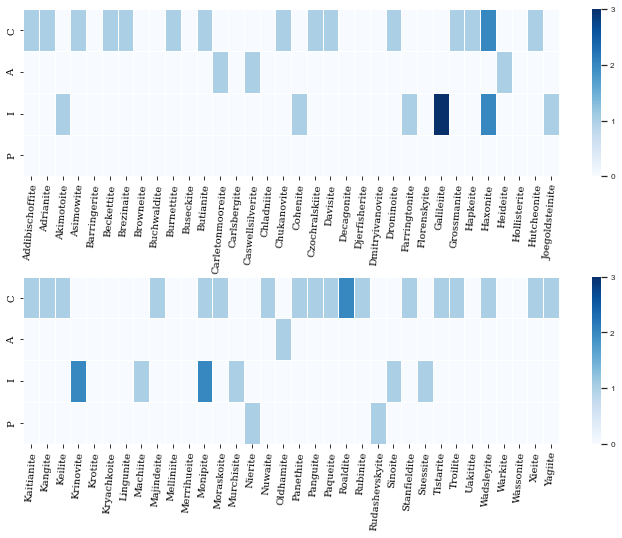

In [3]:
plt.rcParams['font.family']='serif'
fig, axs  = plt.subplots(2, 1, figsize=(12, 8))
sns.set(font_scale=0.75)

ax = axs[0]
ax = sns.heatmap(stacked_1, ax=ax, cmap='Blues', cbar=True,
                 vmin=0, vmax=3, cbar_kws=dict(ticks=[0, 1, 2, 3]),
                 linewidths=.5)

ax = axs[1]
ax = sns.heatmap(stacked_2, ax=ax, cmap='Blues', cbar=True,
                 vmin=0, vmax=3, cbar_kws=dict(ticks=[0, 1, 2, 3]),
                 linewidths=.5)

for ax in [axs[0], axs[1]]: 
    ax.xaxis.set_tick_params(rotation=85)
    ax.set(yticklabels=['C', 'A', 'I', 'P'])

plt.subplots_adjust(hspace=0.6)
#plt.show()
plt.savefig('mineral_dist.pdf', bbox_inches='tight', dpi=200)